In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [73]:
df = pd.read_csv('HRDataset.csv')

In [74]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [75]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [76]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [77]:
df.dropna(thresh=2,inplace=True)

In [78]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [79]:
sns.set_style('darkgrid')

In [80]:

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/(np.timedelta64(1,'W')*52)

In [81]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [82]:
df['Seniority'].head()

0    10.953297
1     5.741758
2     5.010989
3     0.159341
4     4.423077
Name: Seniority, dtype: float64

In [83]:
df[['ManagerName', 'ManagerID', 'PerformanceScore']]

,ManagerName,ManagerID,PerformanceScore
0,Brandon R. LeBlanc,1.0,Fully Meets
1,Brandon R. LeBlanc,1.0,Fully Meets
2,Brandon R. LeBlanc,1.0,Fully Meets
3,Brandon R. LeBlanc,1.0,Fully Meets
4,Brandon R. LeBlanc,1.0,Fully Meets
...,...,...,...
305,Peter Monroe,7.0,Fully Meets
306,Peter Monroe,7.0,Fully Meets
307,Peter Monroe,7.0,Fully Meets
308,Peter Monroe,7.0,Fully Meets


In [85]:
df['PerformanceScoreNo'].value_counts()

PerformanceScoreNo
4    243
3     37
1     18
2     12
Name: count, dtype: int64

# Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)? - TAK

In [86]:
df.groupby('ManagerName')['PerformanceScore'].value_counts(normalize=True)

ManagerName         PerformanceScore 
Alex Sweetwater     Fully Meets          0.666667
                    Exceeds              0.222222
                    Needs Improvement    0.111111
Amy Dunn            Fully Meets          0.714286
                    Exceeds              0.142857
                    PIP                  0.095238
                    Needs Improvement    0.047619
Board of Directors  Fully Meets          1.000000
Brandon R. LeBlanc  Fully Meets          1.000000
Brannon Miller      Fully Meets          0.428571
                    Exceeds              0.333333
                    PIP                  0.190476
                    Needs Improvement    0.047619
Brian Champaigne    Fully Meets          1.000000
David Stanley       Fully Meets          0.904762
                    Exceeds              0.047619
                    Needs Improvement    0.047619
Debra Houlihan      Fully Meets          0.666667
                    Needs Improvement    0.333333
Elijiah Gray

<Axes: xlabel='ManagerName', ylabel='count'>

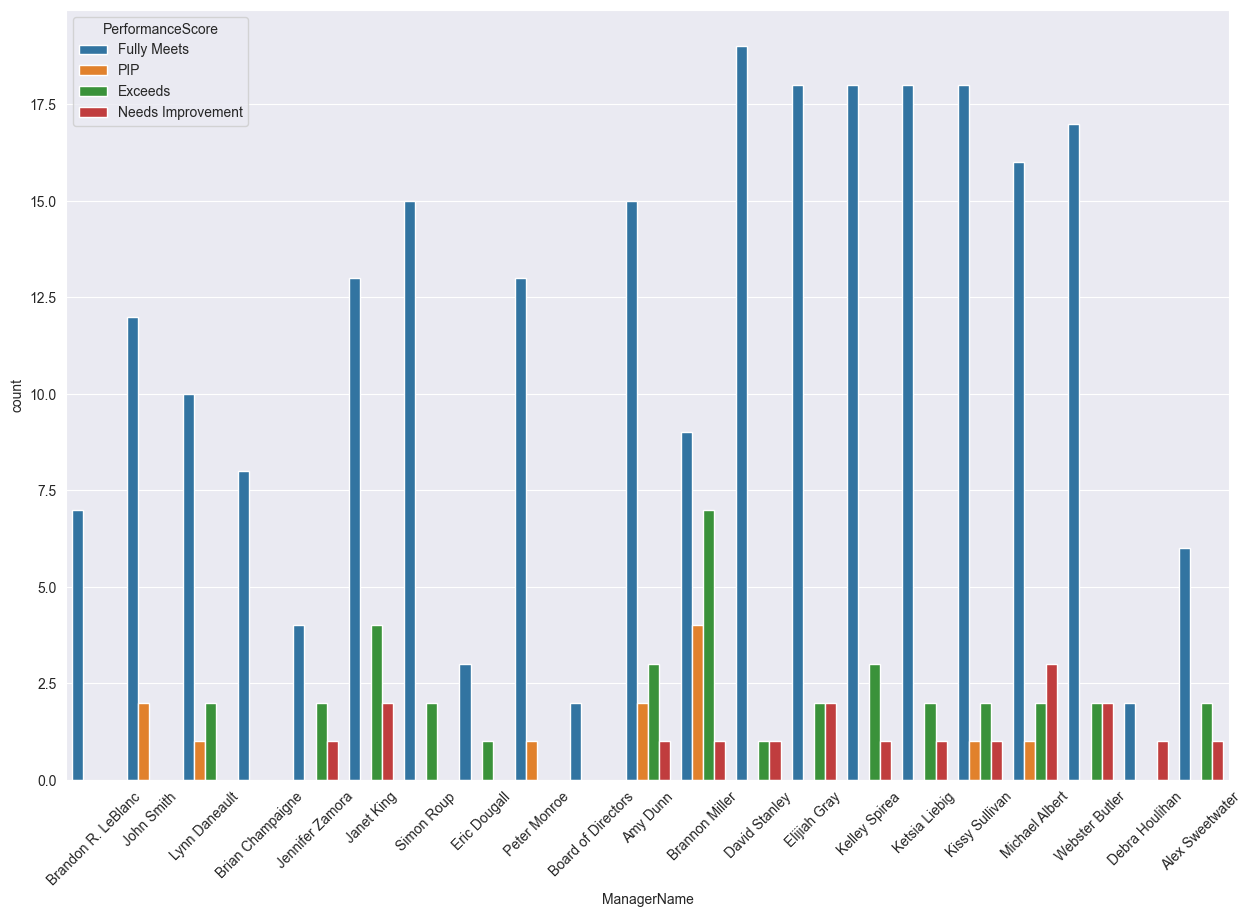

In [87]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=df, x='ManagerName', hue='PerformanceScore')

## Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [88]:
best_rec = df.groupby('RecruitmentSource')['Seniority'].value_counts().reset_index()

In [89]:
best_rec

,RecruitmentSource,Seniority,count
0,Billboard,0.170330,1
1,Billboard,0.733516,1
2,Billboard,0.854396,1
3,Billboard,2.101648,1
4,Billboard,4.076923,1
...,...,...,...
281,Word of Mouth,5.010989,1
282,Word of Mouth,6.010989,1
283,Word of Mouth,7.510989,1
284,Word of Mouth,7.857143,1


In [90]:
pbest_rec = best_rec.pivot_table(values=['Seniority', 'count'], index='RecruitmentSource', aggfunc={'Seniority':'mean', 'count':'count'}).sort_values(by=['Seniority', 'count'], ascending=False)

In [91]:
pbest_rec

,Seniority,count
RecruitmentSource,,
Careerbuilder,8.510989,1
Other,5.939560,8
Billboard,5.882898,16
Website Banner Ads,5.741071,12
Information Session,5.642857,4
MBTA ads,5.592376,16
Professional Society,5.494182,17
Employee Referral,5.058067,22
Pay Per Click - Google,5.026557,21


<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

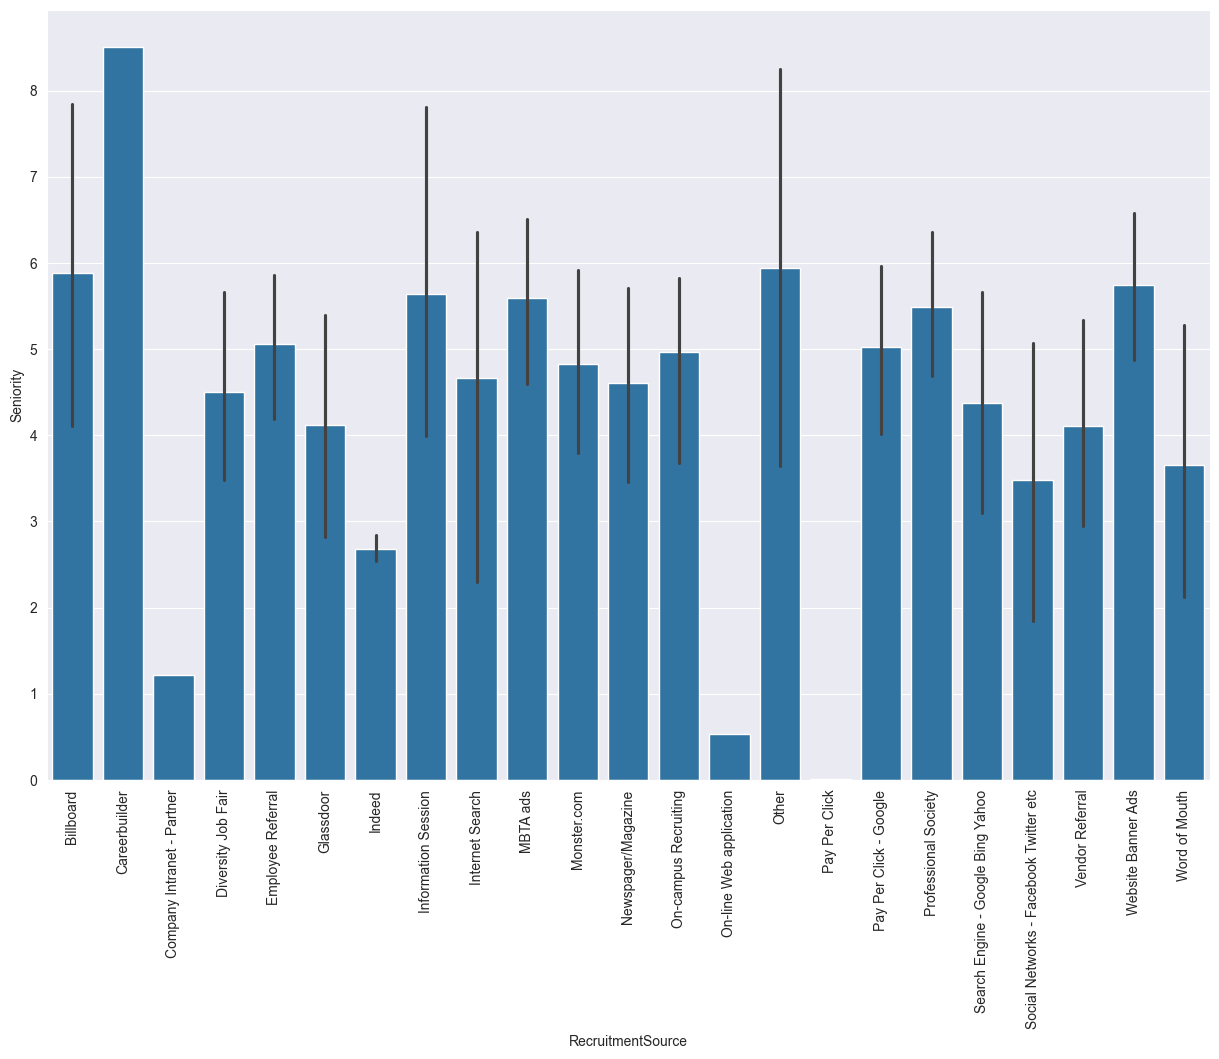

In [92]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data=best_rec, x='RecruitmentSource', y='Seniority', estimator='mean')

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

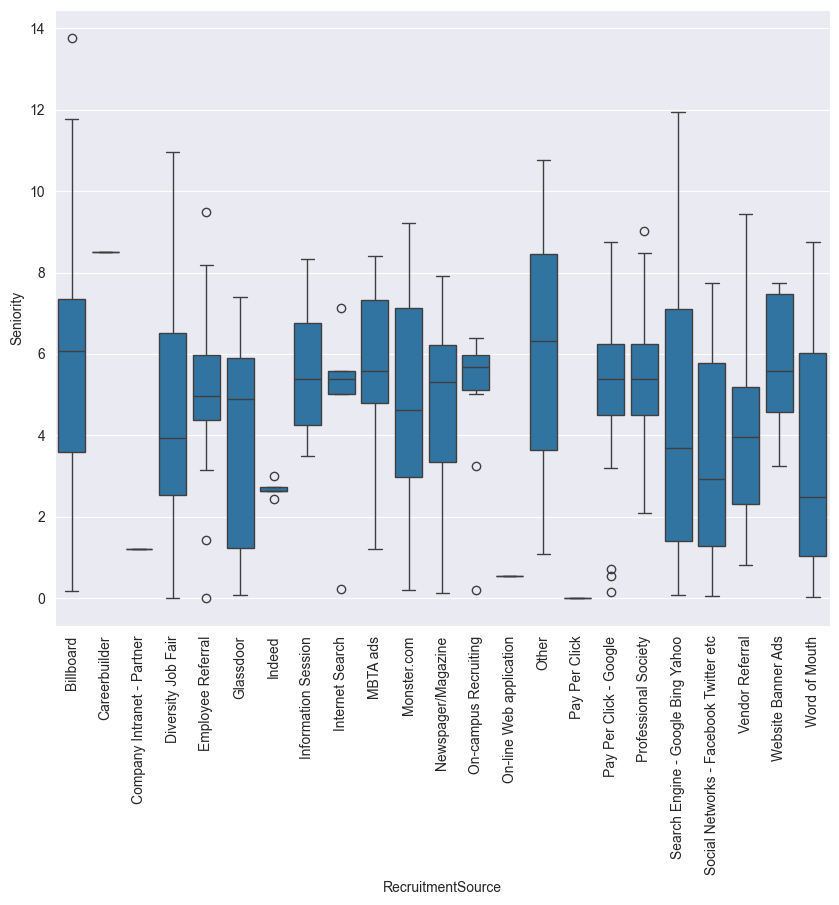

In [93]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.boxplot(y='Seniority',x='RecruitmentSource',data=best_rec)


# Bez pojedyńczych stanowisk

In [94]:
best_rec = best_rec[best_rec['count']>1]

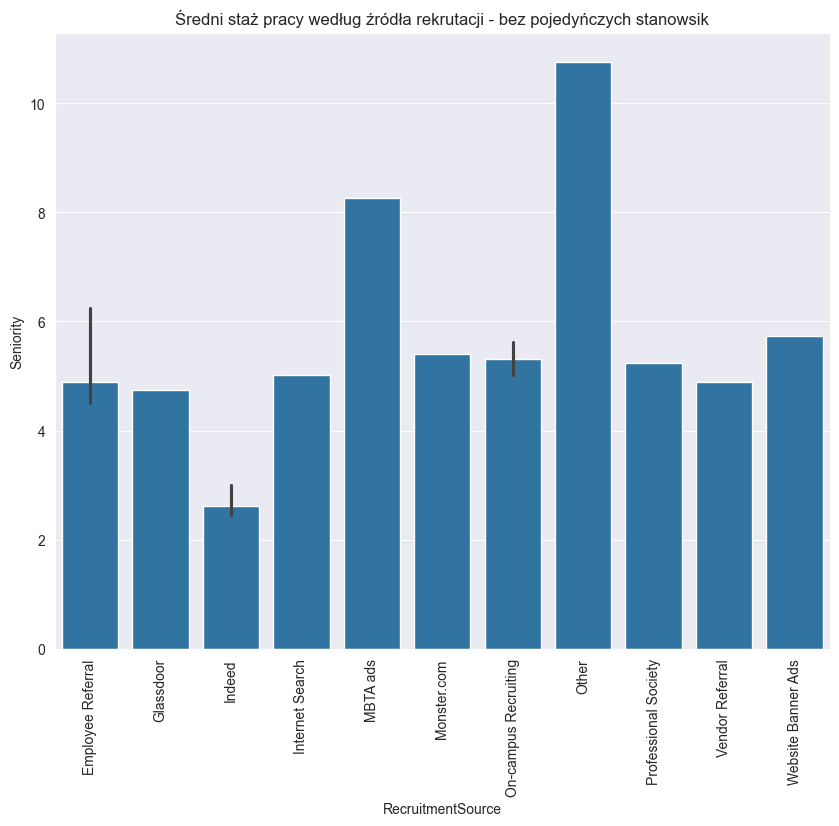

In [95]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(x='RecruitmentSource',y='Seniority',data=best_rec, estimator=np.median)
plt.title('Średni staż pracy według źródła rekrutacji - bez pojedyńczych stanowsik')
plt.show()

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

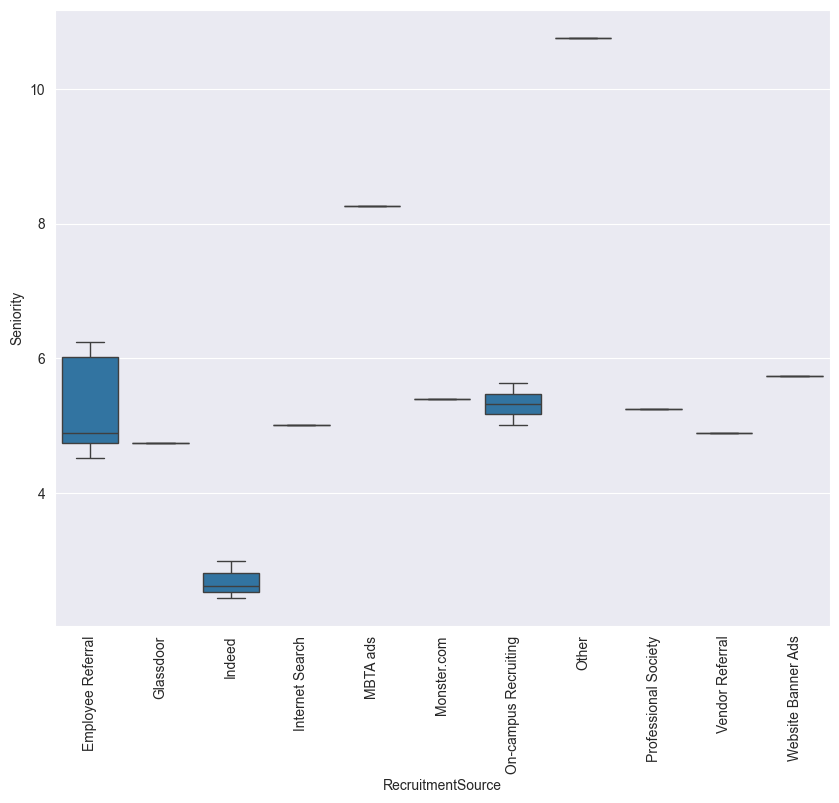

In [96]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.boxplot(y='Seniority',x='RecruitmentSource',data=best_rec)


Porównanie średnich	Barplot	Najprostszy i najbardziej czytelny

Pokazanie rozrzutu	Boxplot	Widać mediany i zakresy

Pokazanie kształtu rozkładu	Violin plot	Pokazuje gęstość danych

Test istotności różnic	ANOVA (f_oneway)	Czy różnice są statystycznie znaczące

Pokazanie rozkładu sns.histplot


# Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)? - TAK, wdowy

In [97]:
df[['MaritalDesc','EmpSatisfaction']]

,MaritalDesc,EmpSatisfaction
0,Married,2.0
1,Divorced,4.0
2,Single,5.0
3,Married,3.0
4,Single,3.0
...,...,...
305,Married,5.0
306,Married,5.0
307,Married,4.0
308,Single,3.0


In [98]:
df.groupby('MaritalDesc')['EmpSatisfaction'].value_counts().reset_index()

,MaritalDesc,EmpSatisfaction,count
0,Divorced,4.0,14
1,Divorced,5.0,9
2,Divorced,3.0,6
3,Divorced,2.0,1
4,Married,3.0,54
5,Married,5.0,33
6,Married,4.0,31
7,Married,2.0,5
8,Separated,5.0,5
9,Separated,3.0,4


In [114]:
df.pivot_table(values='EmpSatisfaction', index='MaritalDesc', aggfunc='mean').sort_values(by=['EmpSatisfaction'], ascending=False)

,EmpSatisfaction
MaritalDesc,
Widowed,4.250000
Divorced,4.033333
Single,3.970803
Separated,3.833333
Married,3.747967


<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

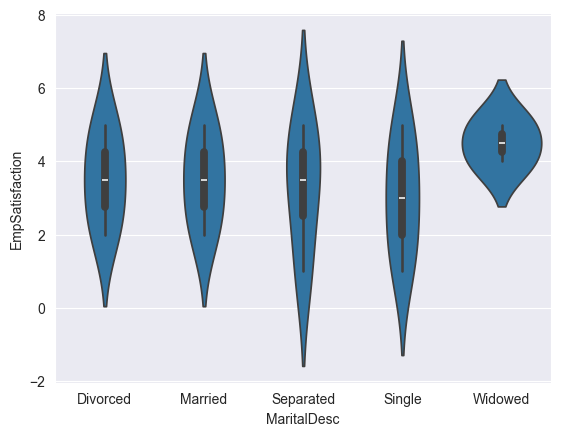

In [115]:
sns.violinplot(data=df.groupby('MaritalDesc')['EmpSatisfaction'].value_counts().reset_index(), x='MaritalDesc', y='EmpSatisfaction')

# Czyli najszczęśliwsze są Wdowy ?

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

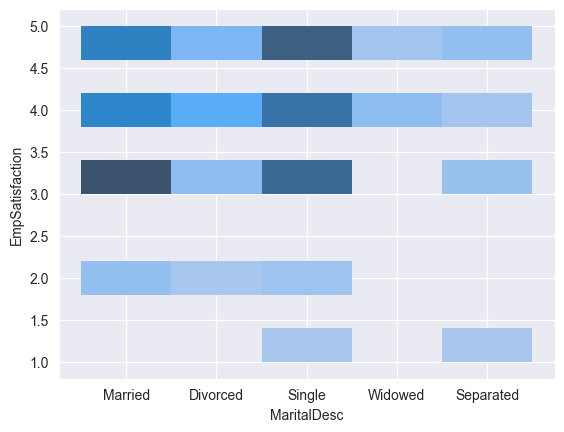

In [111]:
sns.histplot(data=df, x='MaritalDesc', y='EmpSatisfaction')

# Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [101]:
df['Seniority_years'] = df['Seniority'].apply(lambda row: round(row,1))
df.groupby('Seniority_years')['Seniority_years'].count().rename('Seniority_count').reset_index()


,Seniority_years,Seniority_count
0,0.0,5
1,0.1,4
2,0.2,6
3,0.3,5
4,0.5,4
...,...,...
84,10.8,3
85,11.0,1
86,11.8,1
87,11.9,1


In [102]:
df['Seniority_years'].describe()

count    310.000000
mean       4.780968
std        2.646936
min        0.000000
25%        3.025000
50%        5.000000
75%        6.200000
max       13.800000
Name: Seniority_years, dtype: float64

<Axes: xlabel='Seniority_years', ylabel='Seniority_count'>

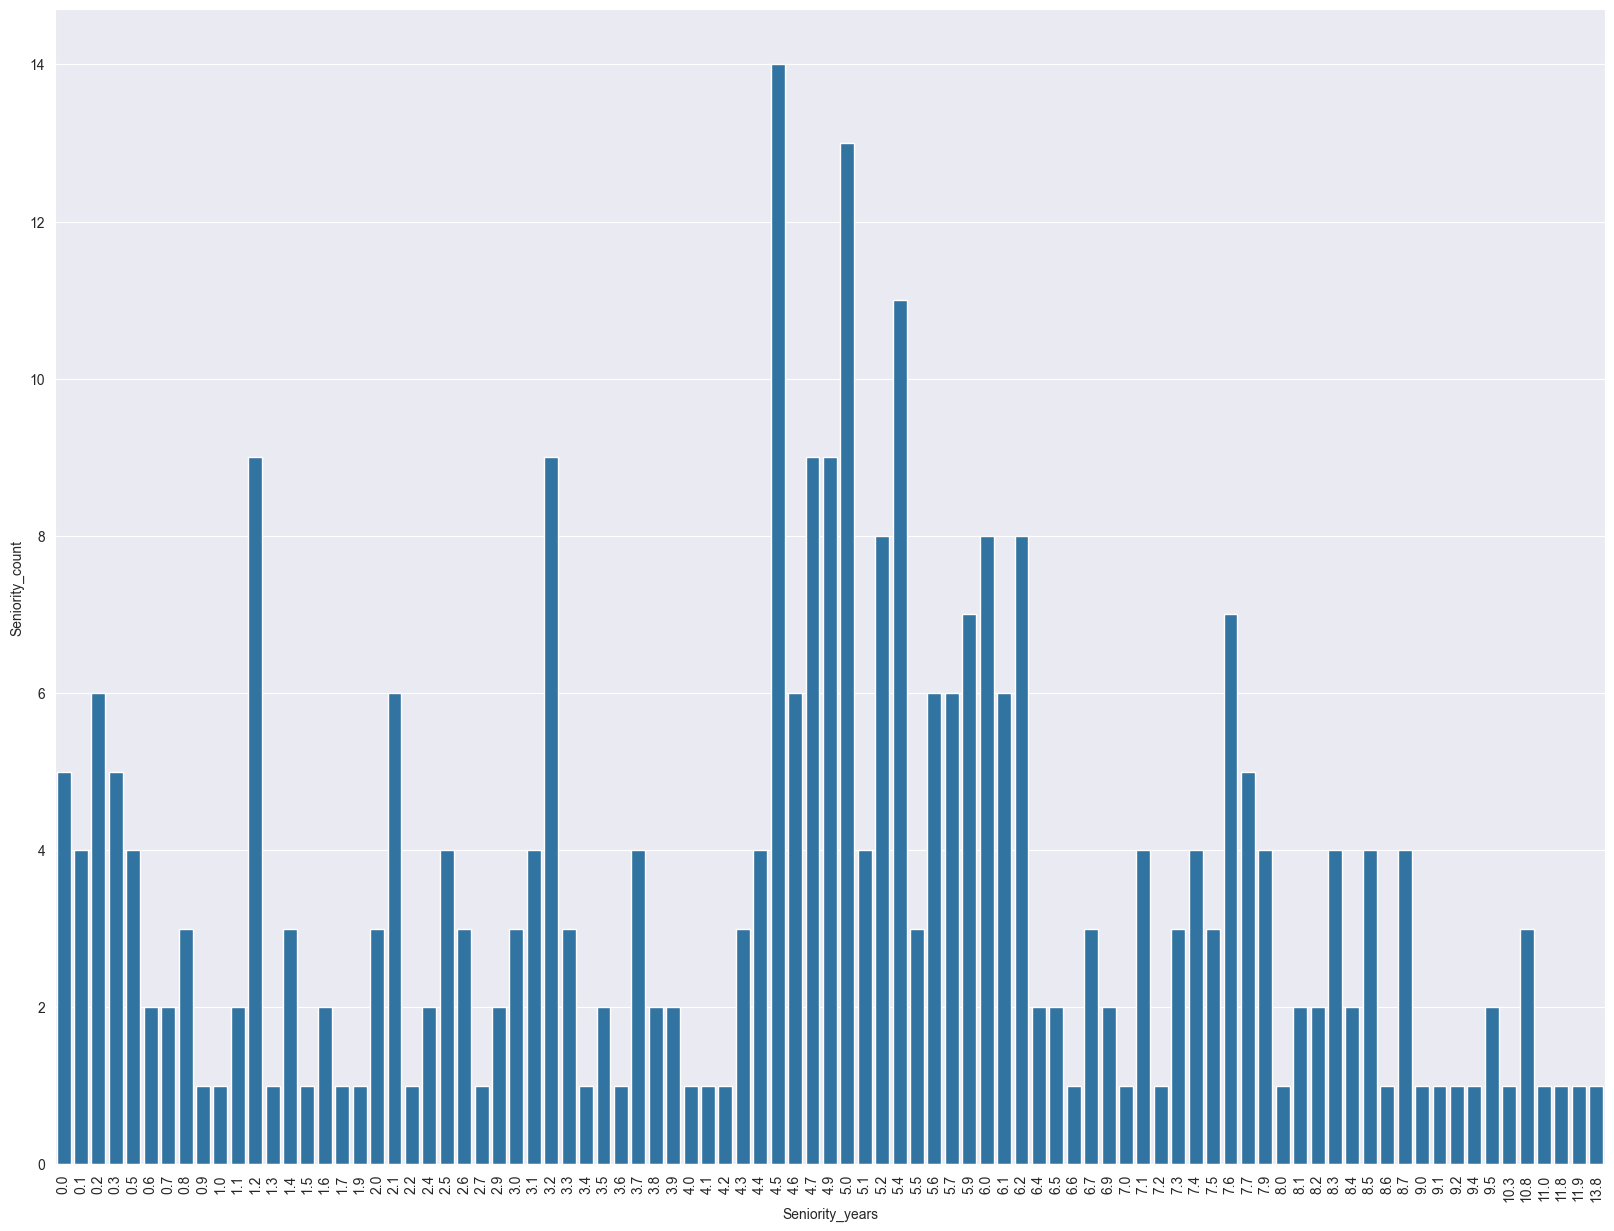

In [103]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
sns.barplot(df.groupby('Seniority_years')['Seniority_years'].count().rename('Seniority_count').reset_index(), x='Seniority_years', y='Seniority_count')


<Axes: xlabel='Seniority', ylabel='Count'>

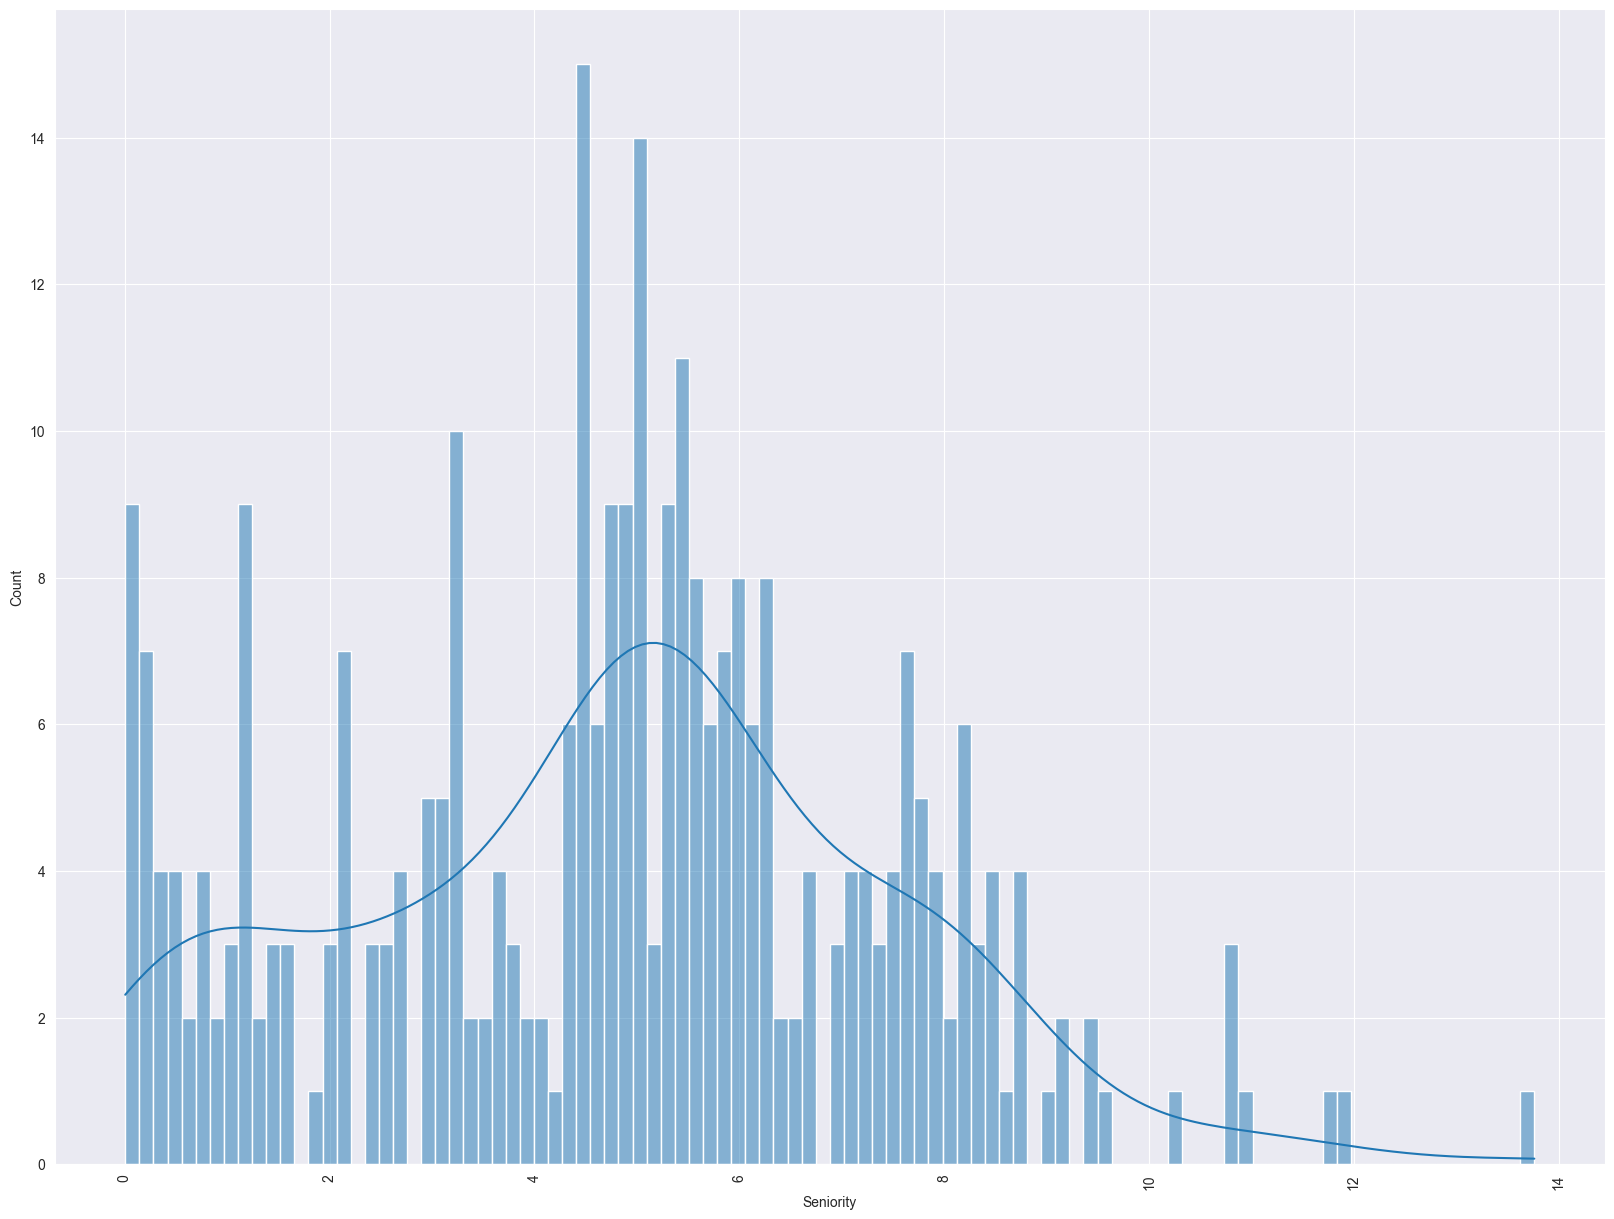

In [104]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
sns.histplot(data=df, x='Seniority', bins=100, kde=True)

# Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy? - NIE

In [105]:
df.groupby('Seniority')['SpecialProjectsCount'].value_counts()

Seniority  SpecialProjectsCount
0.005495   0.0                     2
0.016484   7.0                     1
0.021978   0.0                     2
0.052198   0.0                     1
0.071429   0.0                     1
                                  ..
10.760989  2.0                     1
10.953297  6.0                     1
11.760989  0.0                     1
11.934066  0.0                     1
13.760989  0.0                     1
Name: count, Length: 207, dtype: int64

<Axes: xlabel='Seniority', ylabel='Count'>

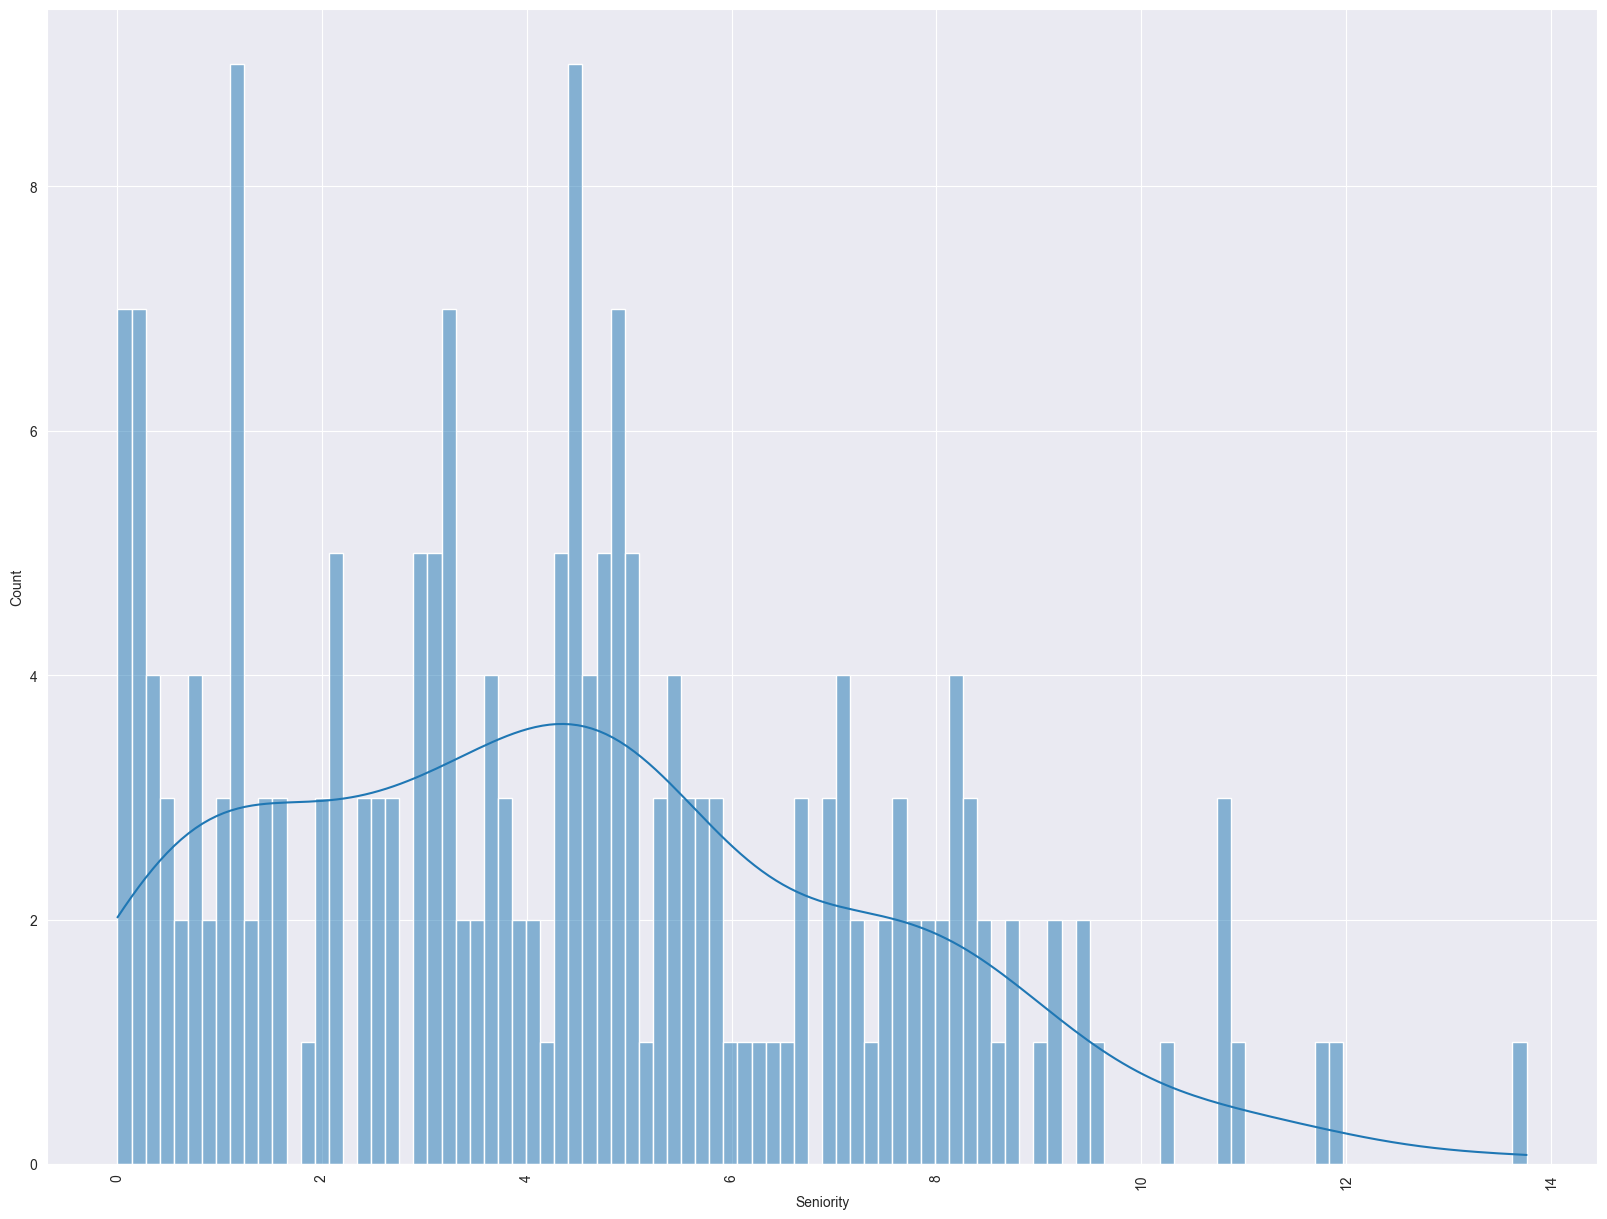

In [106]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
sns.histplot(data=df.groupby('Seniority')['SpecialProjectsCount'].value_counts().reset_index(), x='Seniority', bins=100, kde=True)

<Axes: xlabel='Seniority_years', ylabel='SpecialProjectsCount'>

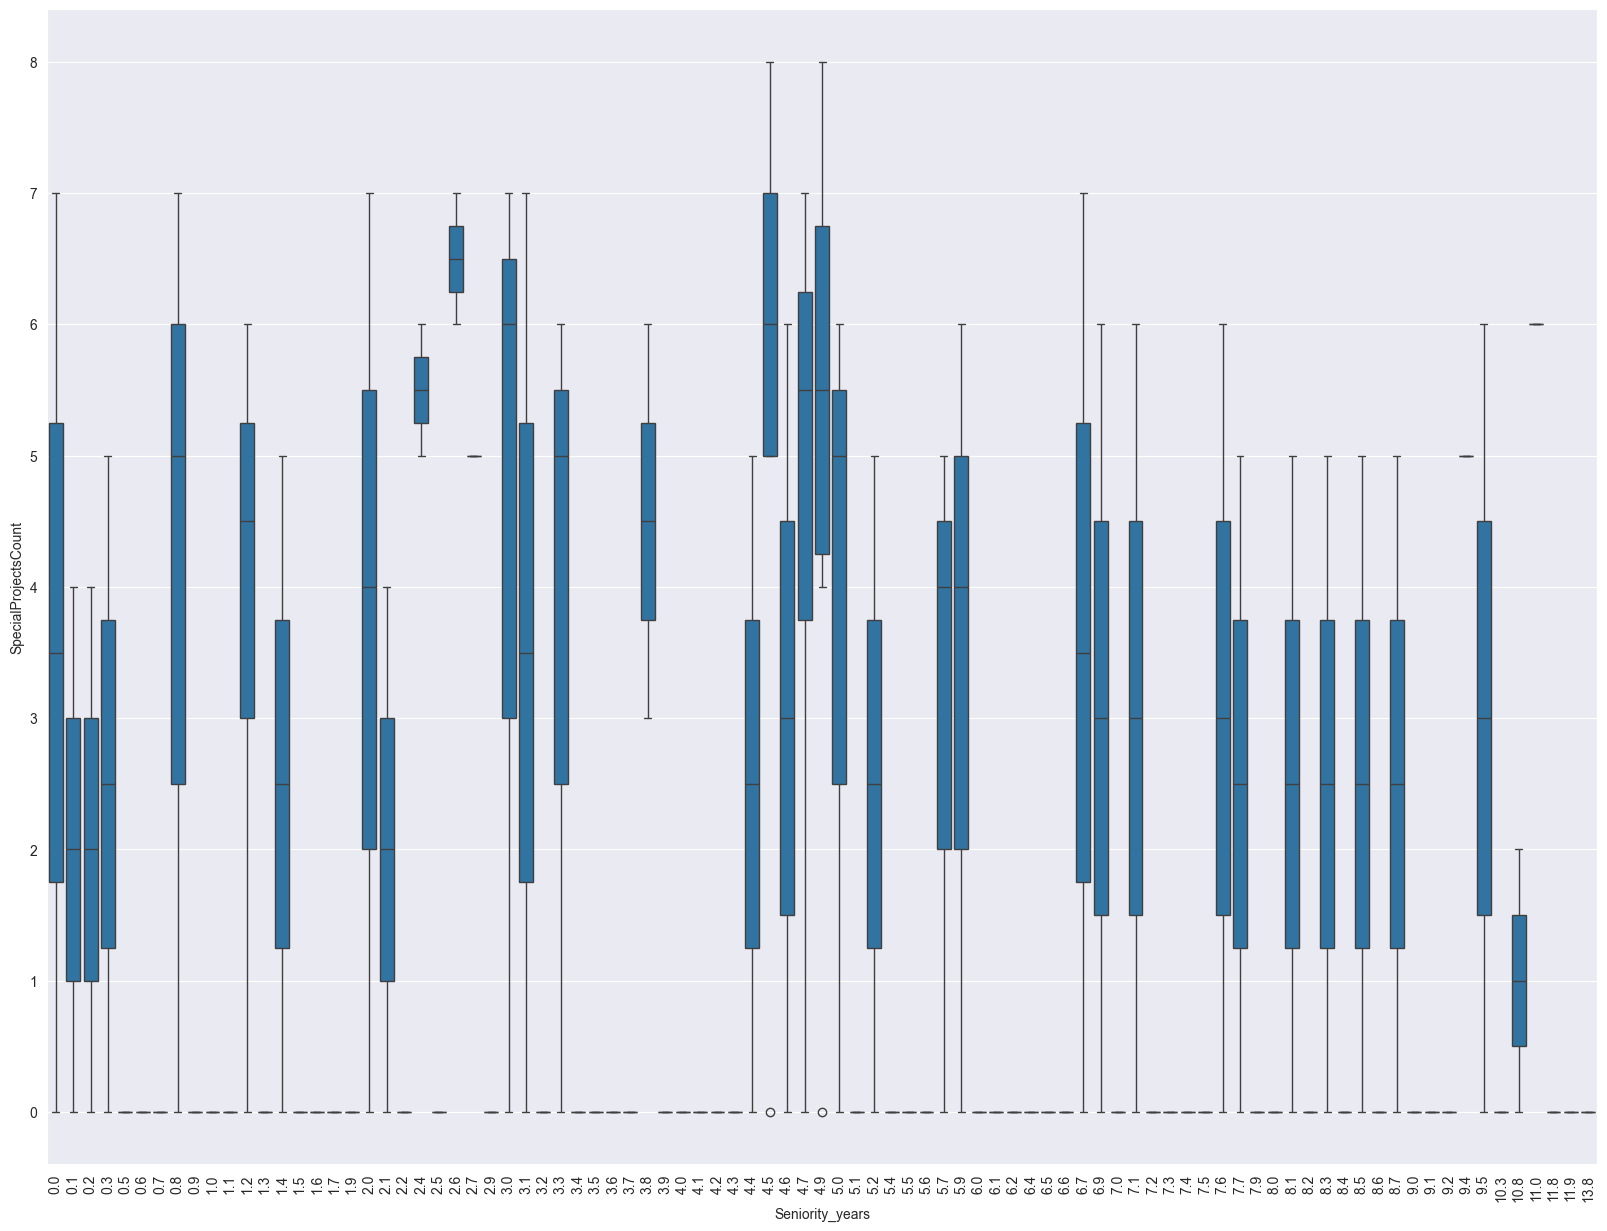

In [107]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
sns.boxplot(data=df.groupby('Seniority_years')['SpecialProjectsCount'].value_counts().reset_index(), x='Seniority_years', y='SpecialProjectsCount')

In [108]:
df.groupby('Seniority')['SpecialProjectsCount'].value_counts().reset_index().describe()


,Seniority,SpecialProjectsCount,count
count,207.000000,207.000000,207.000000
mean,4.367176,1.584541,1.497585
std,2.938512,2.569680,1.317818
min,0.005495,0.000000,1.000000
25%,2.008242,0.000000,1.000000
50%,4.395604,0.000000,1.000000
75%,6.318681,4.000000,1.000000
max,13.760989,8.000000,10.000000


<Axes: >

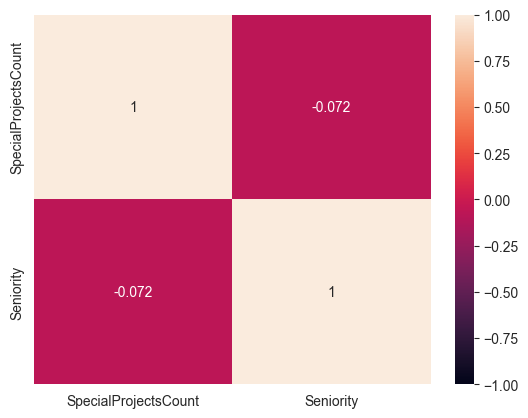

In [109]:
sns.heatmap(df[[ 'SpecialProjectsCount', 'Seniority']].corr(), vmin=-1, vmax=1, annot=True)